In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [26]:
df1 = pd.read_csv("House_Price.csv")
df1.head()

,Flat_Price,EMI_Starts,BHK,Bath,HOUSE_TYPE,Purpose,Location,Area_Type,Total_Sqft,Price_per_sqft,Owner_name,Owner_type
0,8.5 Cr,4.22 Lacs,6 BHK,2,Independent House,for sale in,"Ballygunge, Kolkata",Build Up Area,4200,20.24 K/sqft,Abhijit Chakraborty,Housing Expert
1,45.0 L,23.83 K,3 BHK,1,Independent House,for sale in,"Barrackpore, Kolkata",Build Up Area,1400,3.21 K/sqft,Virtual Reality,Housing Expert
2,1.35 Cr,67.02 K,3 BHK,3,Independent House,for sale in,"Santoshpur, Kolkata",Build Up Area,2500,5.40 K/sqft,AveNew Properties,Housing Expert
3,60.0 L,31.77 K,5 BHK,1,Independent House,for sale in,"Sarsuna, Kolkata",Build Up Area,1100,5.45 K/sqft,Ganapati Real Estate,Housing Expert
4,52.0 L,27.54 K,4 BHK,3,Independent House,for sale in,"Madhyamgram, Kolkata",Build Up Area,900,5.78 K/sqft,Third Eye Consulting,Housing Expert


In [27]:
df1.shape

(3968, 12)

In [28]:
df1.groupby('Area_Type')['Area_Type'].agg('count')

Area_Type
Build Up Area        3966
Possession Starts       2
Name: Area_Type, dtype: int64

In [29]:
df1.isnull().sum()

Flat_Price         0
EMI_Starts         0
BHK                0
Bath               0
HOUSE_TYPE         0
Purpose            2
Location           2
Area_Type          0
Total_Sqft         0
Price_per_sqft     0
Owner_name        10
Owner_type         0
dtype: int64

In [30]:
df2 = df1.dropna()
df2.isnull().sum()

Flat_Price        0
EMI_Starts        0
BHK               0
Bath              0
HOUSE_TYPE        0
Purpose           0
Location          0
Area_Type         0
Total_Sqft        0
Price_per_sqft    0
Owner_name        0
Owner_type        0
dtype: int64

In [31]:
df2.shape

(3956, 12)

In [32]:
df2['BHK'].unique()

array(['6 BHK', '3 BHK', '5 BHK', '4 BHK', '2 BHK', '9 BHK', '10 BHK',
       '7 BHK', '8 BHK', '1 RK', '1 BHK', '2 RK', '10.5 BHK', '3.5 BHK',
       '2.5 BHK', '8.5 BHK', '2 BH', '6 RK'], dtype=object)

In [33]:
def extract_bhk(value):
    try:
        return int(str(value).split(' ')[0])
    except:
        return None

df2['Size (BHK)'] = df2['BHK'].apply(extract_bhk)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_820\3096289292.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Size (BHK)'] = df2['BHK'].apply(extract_bhk)


In [34]:
df2.head()

,Flat_Price,EMI_Starts,BHK,Bath,HOUSE_TYPE,Purpose,Location,Area_Type,Total_Sqft,Price_per_sqft,Owner_name,Owner_type,Size (BHK)
0,8.5 Cr,4.22 Lacs,6 BHK,2,Independent House,for sale in,"Ballygunge, Kolkata",Build Up Area,4200,20.24 K/sqft,Abhijit Chakraborty,Housing Expert,6.0
1,45.0 L,23.83 K,3 BHK,1,Independent House,for sale in,"Barrackpore, Kolkata",Build Up Area,1400,3.21 K/sqft,Virtual Reality,Housing Expert,3.0
2,1.35 Cr,67.02 K,3 BHK,3,Independent House,for sale in,"Santoshpur, Kolkata",Build Up Area,2500,5.40 K/sqft,AveNew Properties,Housing Expert,3.0
3,60.0 L,31.77 K,5 BHK,1,Independent House,for sale in,"Sarsuna, Kolkata",Build Up Area,1100,5.45 K/sqft,Ganapati Real Estate,Housing Expert,5.0
4,52.0 L,27.54 K,4 BHK,3,Independent House,for sale in,"Madhyamgram, Kolkata",Build Up Area,900,5.78 K/sqft,Third Eye Consulting,Housing Expert,4.0


In [35]:
df2['Size (BHK)'].unique()

array([ 6.,  3.,  5.,  4.,  2.,  9., 10.,  7.,  8.,  1., nan])

In [36]:
df2.shape

(3956, 13)

df2[df2.Size (BHK)=nan]

In [37]:
df2['Size (BHK)'].unique()

array([ 6.,  3.,  5.,  4.,  2.,  9., 10.,  7.,  8.,  1., nan])

In [38]:
df2.Total_Sqft.unique()

array(['4200', '1400', '2500', '1100', '900', '1200', '2310', '1170',
       '1862', '1800', '1650', '5000', '15000', '1500', '1440', '1450',
       '4000', '3000', '2584', '720', '2000', '2200', '6000', '9720',
       '6068', '2886', '1876', '2800', '1470', '3600', '1750', '1308',
       '12000', '1395', '1567', '1906', '620', '4500', '834', '5200',
       '2100', '1300', '4320', '1080', '1560', '1480', '2750', '3500',
       '2400', '1000', '1180', '2420', '2366', '1070', '11500', '1552',
       '4400', '3240', '800', '2300', '850', '14000', '1270', '910',
       '1250', '1600', '700', '750', '880', '6098', '3300', '2525',
       '3400', '1280', '1428', '3700', '4753', '980', '10000', '1345',
       '3200', '630', '875', '1700', '4800', '7500', '1982', '1088',
       '3658', '1910', '1284', '1758', '1095', '2180', '1453', '1465',
       '1485', '1680', '1530', '1810', '1110', '3270', '1123', '1260',
       '1935', '948', '988', '1858', '866', '1150', '1550', '2880',
       '2700', '3

In [39]:
df3 = df2.drop(['BHK','Purpose','HOUSE_TYPE','Area_Type','Owner_name','Owner_type'],axis='columns')
df3.head()

,Flat_Price,EMI_Starts,Bath,Location,Total_Sqft,Price_per_sqft,Size (BHK)
0,8.5 Cr,4.22 Lacs,2,"Ballygunge, Kolkata",4200,20.24 K/sqft,6.0
1,45.0 L,23.83 K,1,"Barrackpore, Kolkata",1400,3.21 K/sqft,3.0
2,1.35 Cr,67.02 K,3,"Santoshpur, Kolkata",2500,5.40 K/sqft,3.0
3,60.0 L,31.77 K,1,"Sarsuna, Kolkata",1100,5.45 K/sqft,5.0
4,52.0 L,27.54 K,3,"Madhyamgram, Kolkata",900,5.78 K/sqft,4.0


In [40]:
df3.head()

,Flat_Price,EMI_Starts,Bath,Location,Total_Sqft,Price_per_sqft,Size (BHK)
0,8.5 Cr,4.22 Lacs,2,"Ballygunge, Kolkata",4200,20.24 K/sqft,6.0
1,45.0 L,23.83 K,1,"Barrackpore, Kolkata",1400,3.21 K/sqft,3.0
2,1.35 Cr,67.02 K,3,"Santoshpur, Kolkata",2500,5.40 K/sqft,3.0
3,60.0 L,31.77 K,1,"Sarsuna, Kolkata",1100,5.45 K/sqft,5.0
4,52.0 L,27.54 K,3,"Madhyamgram, Kolkata",900,5.78 K/sqft,4.0


In [41]:
df3.Location.unique()

array(['Ballygunge, Kolkata', 'Barrackpore, Kolkata',
       'Santoshpur, Kolkata', 'Sarsuna, Kolkata', 'Madhyamgram, Kolkata',
       'Thakurpukur, Kolkata', 'Rajpur, Kolkata',
       'North Dum Dum, Kolkata', 'Dhakuria, Kolkata',
       'Shyambazar, Kolkata', 'Nazirabad, Kolkata', 'Joka, Kolkata',
       'Kasba, Kolkata', 'Barisha, Kolkata', 'Behala, Kolkata',
       'Taratala, Kolkata', 'Jodhpur Park, Kolkata',
       'Salt Lake City, Kolkata', 'New Town, Kolkata',
       'Mohispota, Kolkata', 'Maheshtala, Kolkata', 'Naihati, Kolkata',
       'Birati, Kolkata', 'Amtala, Kolkata', 'Gariahat, Kolkata',
       'New Barrakpur, Kolkata', 'Rajpur Sonarpur, Kolkata',
       'Khardah, Kolkata', 'Belghoria, Kolkata', 'Sodepur, Kolkata',
       'Baghbazar, Kolkata', 'Baghajatin, Kolkata', 'Nimta, Kolkata',
       'Lake Gardens, Kolkata', 'Khidirpur, Kolkata',
       'Kolutolla, Kolkata', 'Baguiati, Kolkata',
       'Diamond Harbour, Kolkata', 'Bantala, Kolkata',
       'Tollygunge, Kolkata', 

In [42]:
len(df3.Location.unique())

201

In [43]:
dummies = pd.get_dummies(df3.Location,dtype=int)
dummies.head(10)

,"Abdalpur, Kolkata","Adarsha Nagar, Kolkata","Agarpara, Kolkata","Airport, Kolkata","Alipore, Kolkata","Amtala, Kolkata","Ariadaha, Kolkata","Ashokgarh, Kolkata","Aurobindo Park, Kolkata","Badartala, Kolkata",...,"Thakuranir Chak, Kolkata","Thakurpukur, Kolkata","Tiljala, Kolkata","Tollygunge, Kolkata","Topsia, Kolkata","Ultadanga, Kolkata","Uttarbhag, Kolkata","VIP Nagar, Kolkata","Vedic Village, Kolkata","Ward No 113, Kolkata"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df4 = pd.concat([df3,dummies],axis='columns')
df4.head()

,Flat_Price,EMI_Starts,Bath,Location,Total_Sqft,Price_per_sqft,Size (BHK),"Abdalpur, Kolkata","Adarsha Nagar, Kolkata","Agarpara, Kolkata",...,"Thakuranir Chak, Kolkata","Thakurpukur, Kolkata","Tiljala, Kolkata","Tollygunge, Kolkata","Topsia, Kolkata","Ultadanga, Kolkata","Uttarbhag, Kolkata","VIP Nagar, Kolkata","Vedic Village, Kolkata","Ward No 113, Kolkata"
0,8.5 Cr,4.22 Lacs,2,"Ballygunge, Kolkata",4200,20.24 K/sqft,6.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45.0 L,23.83 K,1,"Barrackpore, Kolkata",1400,3.21 K/sqft,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.35 Cr,67.02 K,3,"Santoshpur, Kolkata",2500,5.40 K/sqft,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0 L,31.77 K,1,"Sarsuna, Kolkata",1100,5.45 K/sqft,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0 L,27.54 K,3,"Madhyamgram, Kolkata",900,5.78 K/sqft,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df5 = df4.drop('Location',axis='columns')
df5.head(2)

,Flat_Price,EMI_Starts,Bath,Total_Sqft,Price_per_sqft,Size (BHK),"Abdalpur, Kolkata","Adarsha Nagar, Kolkata","Agarpara, Kolkata","Airport, Kolkata",...,"Thakuranir Chak, Kolkata","Thakurpukur, Kolkata","Tiljala, Kolkata","Tollygunge, Kolkata","Topsia, Kolkata","Ultadanga, Kolkata","Uttarbhag, Kolkata","VIP Nagar, Kolkata","Vedic Village, Kolkata","Ward No 113, Kolkata"
0,8.5 Cr,4.22 Lacs,2,4200,20.24 K/sqft,6.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45.0 L,23.83 K,1,1400,3.21 K/sqft,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
def convert_price_to_lakhs(price_str):
    if pd.isnull(price_str):
        return None
    price_str = str(price_str).strip().upper()
    try:
        if 'CR' in price_str:
            return float(price_str.replace('CR', '').strip()) * 100
        elif 'L' in price_str:
            return float(price_str.replace('L', '').strip())
        else:
            return None
    except ValueError:
        return None
df5['Price_in_Lakhs'] = df5['Flat_Price'].apply(convert_price_to_lakhs)
df5.head(5)

,Flat_Price,EMI_Starts,Bath,Total_Sqft,Price_per_sqft,Size (BHK),"Abdalpur, Kolkata","Adarsha Nagar, Kolkata","Agarpara, Kolkata","Airport, Kolkata",...,"Thakurpukur, Kolkata","Tiljala, Kolkata","Tollygunge, Kolkata","Topsia, Kolkata","Ultadanga, Kolkata","Uttarbhag, Kolkata","VIP Nagar, Kolkata","Vedic Village, Kolkata","Ward No 113, Kolkata",Price_in_Lakhs
0,8.5 Cr,4.22 Lacs,2,4200,20.24 K/sqft,6.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,850.0
1,45.0 L,23.83 K,1,1400,3.21 K/sqft,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45.0
2,1.35 Cr,67.02 K,3,2500,5.40 K/sqft,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,135.0
3,60.0 L,31.77 K,1,1100,5.45 K/sqft,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60.0
4,52.0 L,27.54 K,3,900,5.78 K/sqft,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,52.0


In [47]:
df5['Price_in_Lakhs'] = df5['Price_in_Lakhs'].apply(lambda x: 800 if x > 800 else x)
df5.head()

,Flat_Price,EMI_Starts,Bath,Total_Sqft,Price_per_sqft,Size (BHK),"Abdalpur, Kolkata","Adarsha Nagar, Kolkata","Agarpara, Kolkata","Airport, Kolkata",...,"Thakurpukur, Kolkata","Tiljala, Kolkata","Tollygunge, Kolkata","Topsia, Kolkata","Ultadanga, Kolkata","Uttarbhag, Kolkata","VIP Nagar, Kolkata","Vedic Village, Kolkata","Ward No 113, Kolkata",Price_in_Lakhs
0,8.5 Cr,4.22 Lacs,2,4200,20.24 K/sqft,6.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,800.0
1,45.0 L,23.83 K,1,1400,3.21 K/sqft,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45.0
2,1.35 Cr,67.02 K,3,2500,5.40 K/sqft,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,135.0
3,60.0 L,31.77 K,1,1100,5.45 K/sqft,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60.0
4,52.0 L,27.54 K,3,900,5.78 K/sqft,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,52.0


In [48]:
def convert_price_to_thousands(price):
    if isinstance(price, str):
        # Handle 'K/sq.ft' format
        if 'K/sqft' in price:
            price = price.replace('K/sqft', '').strip()
            return float(price) * 1000
        # Handle 'rs/sqft' format (no multiplier)
        elif '/sqft' in price:
            price = price.replace('/sqft', '').strip()
            return float(price)
        else:
            return np.nan  # If format is not recognized
    return np.nan  # For non-string values

# Apply this function to the column
df5['Price_per_sqft'] = df5['Price_per_sqft'].apply(convert_price_to_thousands)
df5.head(10)

,Flat_Price,EMI_Starts,Bath,Total_Sqft,Price_per_sqft,Size (BHK),"Abdalpur, Kolkata","Adarsha Nagar, Kolkata","Agarpara, Kolkata","Airport, Kolkata",...,"Thakurpukur, Kolkata","Tiljala, Kolkata","Tollygunge, Kolkata","Topsia, Kolkata","Ultadanga, Kolkata","Uttarbhag, Kolkata","VIP Nagar, Kolkata","Vedic Village, Kolkata","Ward No 113, Kolkata",Price_in_Lakhs
0,8.5 Cr,4.22 Lacs,2,4200,20240.0,6.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,800.0
1,45.0 L,23.83 K,1,1400,3210.0,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45.0
2,1.35 Cr,67.02 K,3,2500,5400.0,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,135.0
3,60.0 L,31.77 K,1,1100,5450.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60.0
4,52.0 L,27.54 K,3,900,5780.0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,52.0
5,32.0 L,16.95 K,3,1200,2670.0,3.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,32.0
6,69.3 L,36.70 K,4,2310,3000.0,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,69.3
7,40.0 L,21.18 K,4,1170,3420.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40.0
8,95.0 L,47.16 K,2,1862,5100.0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,95.0
9,3.0 Cr,1.49 Lacs,1,4200,7140.0,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,300.0


In [49]:
df5.shape

(3956, 208)

In [50]:
df6 = df5.drop(['Flat_Price','EMI_Starts'],axis='columns')
df6.head(5)

,Bath,Total_Sqft,Price_per_sqft,Size (BHK),"Abdalpur, Kolkata","Adarsha Nagar, Kolkata","Agarpara, Kolkata","Airport, Kolkata","Alipore, Kolkata","Amtala, Kolkata",...,"Thakurpukur, Kolkata","Tiljala, Kolkata","Tollygunge, Kolkata","Topsia, Kolkata","Ultadanga, Kolkata","Uttarbhag, Kolkata","VIP Nagar, Kolkata","Vedic Village, Kolkata","Ward No 113, Kolkata",Price_in_Lakhs
0,2,4200,20240.0,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,800.0
1,1,1400,3210.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45.0
2,3,2500,5400.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,135.0
3,1,1100,5450.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60.0
4,3,900,5780.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,52.0


In [51]:
median_bhk = df6['Size (BHK)'].median()
df6['Size (BHK)'].fillna(median_bhk, inplace=True)
df6.head(10)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_820\912364009.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df6['Size (BHK)'].fillna(median_bhk, inplace=True)


,Bath,Total_Sqft,Price_per_sqft,Size (BHK),"Abdalpur, Kolkata","Adarsha Nagar, Kolkata","Agarpara, Kolkata","Airport, Kolkata","Alipore, Kolkata","Amtala, Kolkata",...,"Thakurpukur, Kolkata","Tiljala, Kolkata","Tollygunge, Kolkata","Topsia, Kolkata","Ultadanga, Kolkata","Uttarbhag, Kolkata","VIP Nagar, Kolkata","Vedic Village, Kolkata","Ward No 113, Kolkata",Price_in_Lakhs
0,2,4200,20240.0,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,800.0
1,1,1400,3210.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45.0
2,3,2500,5400.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,135.0
3,1,1100,5450.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60.0
4,3,900,5780.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,52.0
5,3,1200,2670.0,3.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,32.0
6,4,2310,3000.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,69.3
7,4,1170,3420.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40.0
8,2,1862,5100.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,95.0
9,1,4200,7140.0,9.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,300.0


In [52]:
def adjust_bathrooms_df6():
    # Ensure correct data types
    df6['Size (BHK)'] = df6['Size (BHK)'].astype(float)
    df6['Bath'] = df6['Bath'].astype(float)

    def fix_bath(row):
        bhk = row['Size (BHK)']
        bath = row['Bath']
        
        if bhk == 1:
            return max(1.0, min(bath, 1.0))
        elif 2 <= bhk <= 5:
            return max(2.0, min(bath, bhk))
        elif 6 <= bhk <= 10:
            return max(6.0, min(bath, bhk))
        else:
            # For any other case (e.g., unexpected BHK values), cap bath to BHK
            return min(bath, bhk)
    
    df6['Bath'] = df6.apply(fix_bath, axis=1)

adjust_bathrooms_df6()

In [53]:
# Ensure required columns are numeric
df6['Total_Sqft'] = pd.to_numeric(df6['Total_Sqft'], errors='coerce')
df6['Size (BHK)'] = pd.to_numeric(df6['Size (BHK)'], errors='coerce')
df6['Bath'] = pd.to_numeric(df6['Bath'], errors='coerce')


df6['bhk_per_sqft'] = df6['Size (BHK)'] / df6['Total_Sqft']
df6['bath_per_sqft'] = df6['Bath'] / df6['Total_Sqft']
df6.head()

,Bath,Total_Sqft,Price_per_sqft,Size (BHK),"Abdalpur, Kolkata","Adarsha Nagar, Kolkata","Agarpara, Kolkata","Airport, Kolkata","Alipore, Kolkata","Amtala, Kolkata",...,"Tollygunge, Kolkata","Topsia, Kolkata","Ultadanga, Kolkata","Uttarbhag, Kolkata","VIP Nagar, Kolkata","Vedic Village, Kolkata","Ward No 113, Kolkata",Price_in_Lakhs,bhk_per_sqft,bath_per_sqft
0,6.0,4200,20240.0,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,800.0,0.001429,0.001429
1,2.0,1400,3210.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,45.0,0.002143,0.001429
2,3.0,2500,5400.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,135.0,0.001200,0.001200
3,2.0,1100,5450.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,60.0,0.004545,0.001818
4,3.0,900,5780.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,52.0,0.004444,0.003333


In [54]:
df6['bhk_per_sqft'] = df6['bhk_per_sqft'].replace([np.inf, -np.inf], 0).fillna(0)
df6['bath_per_sqft'] = df6['bath_per_sqft'].replace([np.inf, -np.inf], 0).fillna(0)

In [55]:
x = df6.drop('Price_in_Lakhs',axis='columns')
x.head()

,Bath,Total_Sqft,Price_per_sqft,Size (BHK),"Abdalpur, Kolkata","Adarsha Nagar, Kolkata","Agarpara, Kolkata","Airport, Kolkata","Alipore, Kolkata","Amtala, Kolkata",...,"Tiljala, Kolkata","Tollygunge, Kolkata","Topsia, Kolkata","Ultadanga, Kolkata","Uttarbhag, Kolkata","VIP Nagar, Kolkata","Vedic Village, Kolkata","Ward No 113, Kolkata",bhk_per_sqft,bath_per_sqft
0,6.0,4200,20240.0,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.001429,0.001429
1,2.0,1400,3210.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.002143,0.001429
2,3.0,2500,5400.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.001200,0.001200
3,2.0,1100,5450.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.004545,0.001818
4,3.0,900,5780.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.004444,0.003333


In [56]:
print("✅ Training phase:")
print("Training feature count:", len(x.columns))
print("Feature columns saved:", x.columns.tolist())

✅ Training phase:
Training feature count: 207
Feature columns saved: ['Bath', 'Total_Sqft', 'Price_per_sqft', 'Size (BHK)', 'Abdalpur, Kolkata', 'Adarsha Nagar, Kolkata', 'Agarpara, Kolkata', 'Airport, Kolkata', 'Alipore, Kolkata', 'Amtala, Kolkata', 'Ariadaha, Kolkata', 'Ashokgarh, Kolkata', 'Aurobindo Park, Kolkata', 'Badartala, Kolkata', 'Baghajatin, Kolkata', 'Baghbazar, Kolkata', 'Bagmari, Kolkata', 'Bagnan, Kolkata', 'Bagpota, Kolkata', 'Baguiati, Kolkata', 'Baguihati, Kolkata', 'Baishnabghata Patuli Township,', 'Baithakkhana, Kolkata', 'Ballygunge, Kolkata', 'Bamangachhi, Kolkata', 'Bamunpara, Kolkata', 'Bangaon, Kolkata', 'Bansdroni, Kolkata', 'Bantala, Kolkata', 'Barabazar Market, Kolkata', 'Baranagar, Kolkata', 'Barasat, Kolkata', 'Barisha, Kolkata', 'Barrackpore, Kolkata', 'Baruipur P, Kolkata', 'Baruipur, Kolkata', 'Basirhat, Kolkata', 'Behala, Kolkata', 'Belgachia, Kolkata', 'Belghoria, Kolkata', 'Beliaghata, Kolkata', 'Beniapukur, Kolkata', 'Beniatola, Kolkata', 'Berunanp

In [57]:
feature_columns = x.columns

In [58]:
y = df6.Price_in_Lakhs
y.head()

0    800.0
1     45.0
2    135.0
3     60.0
4     52.0
Name: Price_in_Lakhs, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8396976110770457

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82706151, 0.83905539, 0.82738004, 0.85392534, 0.8151107 ])

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def find_best_model(x,y):
    algos = {
        'linear_regression' : {
            'model': make_pipeline(StandardScaler(), LinearRegression()),
            'params': {}
        },
        'lasso' : {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(x,y)

C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\LENOVO\AppData\Roaming\Pyt

,model,best_score,best_params
0,linear_regression,0.832516,{}
1,lasso,0.781355,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.994295,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [63]:
def predict_price(location, sqft, bhk, bath):
    x_input = np.zeros(len(feature_columns))  # <-- defined here

    try:
        x_input[feature_columns.get_loc('Bath')] = bath
        x_input[feature_columns.get_loc('Total_Sqft')] = sqft
        x_input[feature_columns.get_loc('Size (BHK)')] = bhk
        x_input[feature_columns.get_loc('bhk_per_sqft')] = bhk / sqft if sqft > 0 else 0
        x_input[feature_columns.get_loc('bath_per_sqft')] = bath / sqft if sqft > 0 else 0
    except KeyError as e:
        return f"Feature not found in columns: {e}"

    if location in feature_columns:
        loc_index = feature_columns.get_loc(location)
        x_input[loc_index] = 1
    else:
        return f"Location '{location}' not found in training data."

    return abs(lr_clf.predict([x_input])[0])

In [64]:
predict_price('Bhowanipore, Kolkata', 1800, 3, 3)

C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(89.62411519064472)

In [65]:
print(y_train.describe())
print(y_train[y_train <= 0])  # Shows any invalid price entries

count    3164.000000
mean      154.379791
std       176.972310
min         1.350000
25%        48.000000
50%        85.000000
75%       180.000000
max       800.000000
Name: Price_in_Lakhs, dtype: float64
Series([], Name: Price_in_Lakhs, dtype: float64)


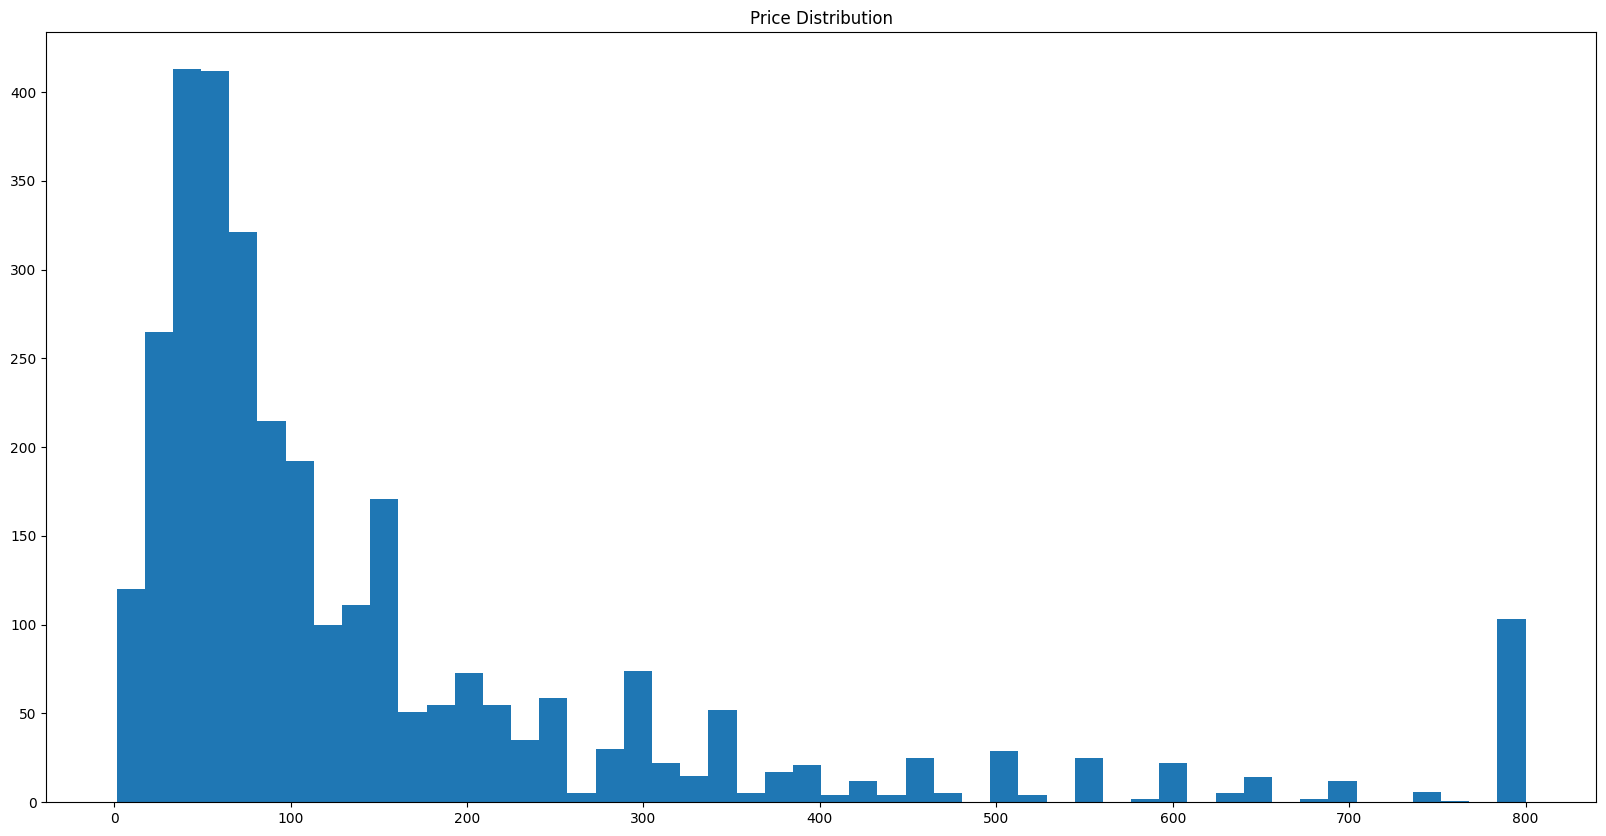

In [66]:
import matplotlib.pyplot as plt
plt.hist(y_train, bins=50)
plt.title("Price Distribution")
plt.show()

In [67]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


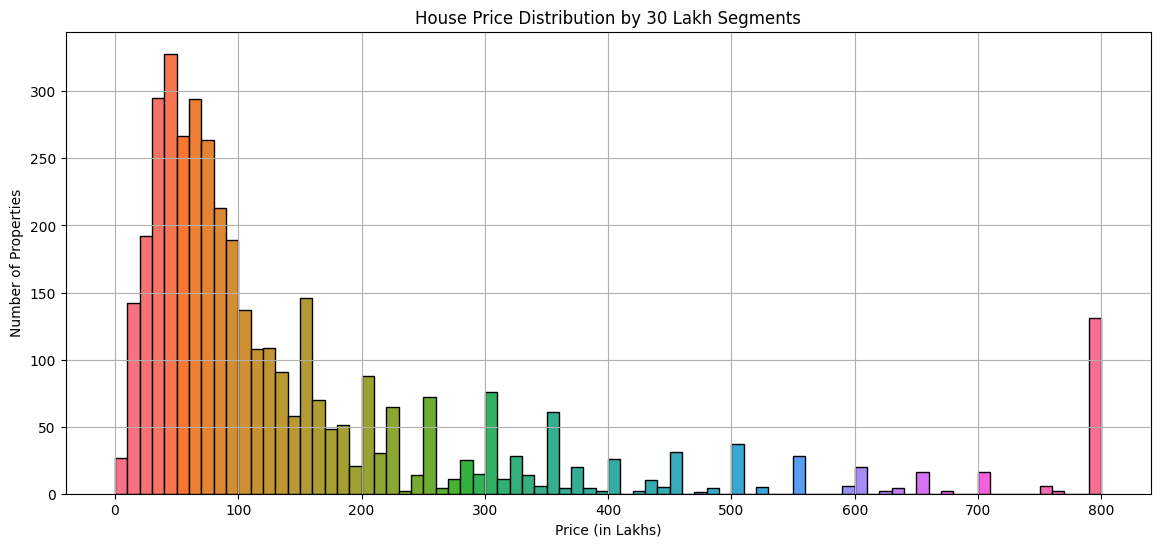

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming price is in lakhs
bin_size = 10  # 30 lakh intervals
max_price = df6['Price_in_Lakhs'].max()
bins = np.arange(0, max_price + bin_size, bin_size)

# Set up the color palette
colors = sns.color_palette("husl", len(bins) - 1)

# Create histogram
plt.figure(figsize=(14, 6))
n, bins, patches = plt.hist(df6['Price_in_Lakhs'], bins=bins, edgecolor='black')

# Color each bar differently
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.xlabel("Price (in Lakhs)")
plt.ylabel("Number of Properties")
plt.title("House Price Distribution by 30 Lakh Segments")
plt.grid(True)
plt.show()

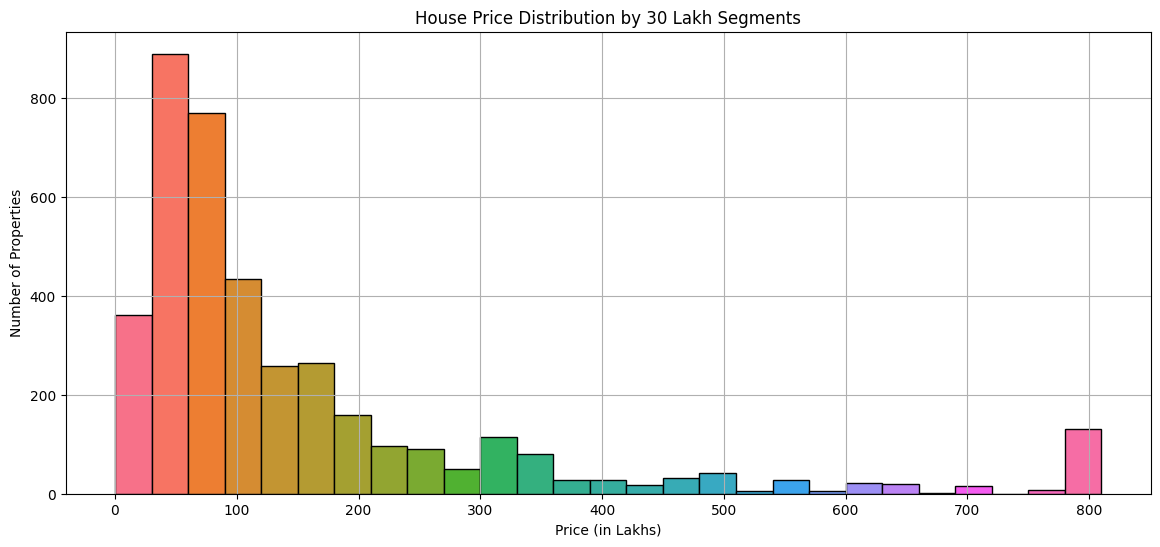

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming price is in lakhs
bin_size = 30  # 30 lakh intervals
max_price = df6['Price_in_Lakhs'].max()
bins = np.arange(0, max_price + bin_size, bin_size)

# Set up the color palette
colors = sns.color_palette("husl", len(bins) - 1)

# Create histogram
plt.figure(figsize=(14, 6))
n, bins, patches = plt.hist(df6['Price_in_Lakhs'], bins=bins, edgecolor='black')

# Color each bar differently
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.xlabel("Price (in Lakhs)")
plt.ylabel("Number of Properties")
plt.title("House Price Distribution by 30 Lakh Segments")
plt.grid(True)
plt.show()

In [72]:
import pickle
with open('Kolkata_House_Prices.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [71]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))